In [1]:
%load_ext autoreload
%autoreload 2
%cd ~/n-cov-19

/home/ecotner/n-cov-19


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import ncov19

### Fit parameter to nonlinear function

k = 1.2279247478994304
K = 1.23456789
|K-k| = 0.006643142100569488
loss = 0.09971688450941642


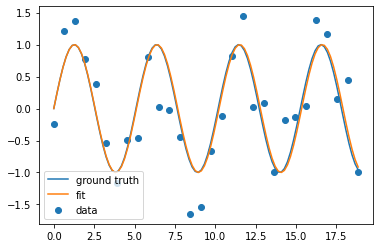

In [101]:
# Generate noisy data
x = np.linspace(0, 6*np.pi, 30)
K = 1.23456789
y = np.sin(K*x) + 0.5*np.random.randn(len(x))

# Use gradient descent to fit k
k = 1
lr = 1e-2
for _ in range(100):
    grad = -(y - np.sin(k*x))*np.cos(k*x)*x
    grad = grad.mean()
    k = k - lr*grad
print(f"k = {k}")
print(f"K = {K}")
print(f"|K-k| = {abs(K-k)}")
print(f"loss = {0.5*((y - np.sin(k*x))**2).mean()}")

# Plot comparison
plt.scatter(x, y, label="data")
x = np.linspace(0, 6*np.pi, 100)
y = np.sin(K*x)
plt.plot(x, y, label='ground truth')
y = np.sin(k*x)
plt.plot(x, y, label='fit')
plt.legend()
plt.show()

### Fit parameter to linear differential equation
This will be a more difficult problem because the instantaneous derivative (and higher orders) will be difficult to estimate due to the noise.

k = 1.1695084201483212
K = 1.23456789
|K-k| = 0.06505946985167865
loss = 0.12930371055117912


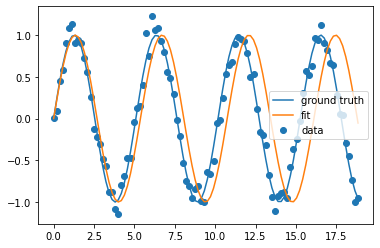

In [117]:
# Generate noisy data
x = np.linspace(0, 6*np.pi, 100)
K = 1.23456789
y = pd.Series(np.sin(K*x) + 0.1*np.random.randn(len(x)))
# X = pd.DataFrame([x, y, y.shift(+1), y.shift(-1)], index=['x','yi','yi-1','yi+1']).T.dropna()

# Use gradient descent to fit k, y(0) and y'(0)
k = 1
y_0 = 0
y1_0 = 1
lr = 1e-3
for _ in range(100):
    # Numerically solve the equation given the parameters
    X = np.linspace(0, 6*np.pi, 100)
    Y = np.zeros(size=(len(X), 3))
    
    
    # Calculate the gradient of the loss function
    grad = ((X['yi+1'] - 2*X['yi'] + X['yi-1'])/(dx**2) + (k**2)*X['yi'])*(2*k*X['yi'])
    grad = grad.mean(axis=0)
    k = k - lr*grad
print(f"k = {k}")
print(f"K = {K}")
print(f"|K-k| = {abs(K-k)}")
print(f"loss = {0.5*((y - np.sin(k*x))**2).mean()}")

# Plot comparison
plt.scatter(x, y, label="data")
x = np.linspace(0, 6*np.pi, 100)
y = np.sin(K*x)
plt.plot(x, y, label='ground truth')
y = np.sin(k*x)
plt.plot(x, y, label='fit')
plt.legend()
plt.show()

In [108]:
X

,x,yi,yi-1,yi+1
1,0.384685,0.658665,-0.009342,0.733301
2,0.769370,0.733301,0.658665,0.977311
3,1.154054,0.977311,0.733301,0.966893
4,1.538739,0.966893,0.977311,0.797650
5,1.923424,0.797650,0.966893,0.203332
6,2.308109,0.203332,0.797650,-0.066342
7,2.692794,-0.066342,0.203332,-0.502654
8,3.077479,-0.502654,-0.066342,-1.004246
9,3.462163,-1.004246,-0.502654,-0.936865
10,3.846848,-0.936865,-1.004246,-0.924539
